### Docker 
Docker is a platform which is designed for applications **packaging, delivering and running in containers.** There are two main elements: **Images and Containers.** 

### Why Docker?
Each app has its own dependencies and libraries and **any change leads to changes in all other apps.** As a result, all conflicts have to be manually solved.
<br>
<img src="img/no-docker-approach.png" alt="drawing" width="500"/>
<br>
Docker isolates each app in a container. As a result, **libraries and dependencies** for each app are **isolated and don't affect on other apps.**
<br>
<img src="img/docker-approach.png" alt="drawing" width="500"/>
<br>

### Docker Image
It's a uniform mechanism for an application building (i.e. a blueprint of a future Container). It has layers and includes:
- **OS Image**
- **App Code**
- **Libraries**
- **Dependencies**

**Docker Image** can be created either **manually using a Dockerfile** (a recipe for a future Container blueprint) or **downloaded from a Docker Hub.** An Image has a **layer architecture** (e.g. base layer: Python, Ubuntu, Alpine...)

Images can be:
- **Base Images** -  usually OS (e.g. ubuntu, busybox or debian)
- **Child Images** - Images using base Images and having a new functionality

On top of a **base layer** other layers can be added (e.g. layer with libraries)
<br>
<img src="img/image-layers.png" alt="drawing" width="500"/>
<br>
From the same Image **many different Containers can be created.**
<br>
<img src="img/img-container.png" alt="drawing" width="500"/>

### Dockerfile
A **Dockerfile** is a file that contains a set of instructions that **describe an environment configuration.** (e.g. an environment that ran Ubuntu 14.04, had vim installed, and had port 80 open). Dockerfile must be defined as following: ```Dockerfile``` without any extensions. As it was mentioned it has a **layer architecture.**

Every layer except the last one is **Read-Only**. Actually, **every layer is just a file that describes changes from the previous layer.** In addition, if a layer already exists, it isn't rebuilt...it's reused. **The last layer is Read-Write.**
<img src="img/docker-file.png" alt="drawing" width="900"/>

**Layers** are created using the following **instructions:**
1. ```FROM``` - creates the base (parental) image
2. ```LABEL``` - describes metadata (e.g. data about who created and supports the current Image)
3. ```ENV``` - sets constant **environmet variables** which then will be available when a container will be running
4. ```RUN``` - executes a command and **creates an Image layer** (e.g. libraries installation/update into the Image)
5. ```COPY``` - copies files and folders into the container
6. ```ADD``` - the same as ```COPY``` but has additional features 
7. ```CMD``` - describes a command with arguments which must be executed when a container will be built
8. ```WORKDIR``` - sets a working directory for the next instruction 
9. ```ARG``` - sets variables for Docker when Image is building
10. ```ENTRYPOINT``` - execute a command when a container is running
11. ```EXPOSE``` - makes a certain port available (exposed)
12. ```VOLUME``` - creates a place for working with storage

More commands can be found here:
- https://devhints.io/dockerfile
- https://kapeli.com/cheat_sheets/Dockerfile.docset/Contents/Resources/Documents/index

### Difference Between ```CMD``` and ```ENTRYPOINT```:
Parameters passed in ```CMD``` are replaced entirely.

Parameters passed in ```ENTRYPOINT``` are appended.
<br>
<img src="img/cmd-entrypoint-diff.png" alt="drawing" width="700"/>
<br>
**Important**
- Only one ```CMD``` command can be defined in a Dockerfile. If there're several ones, all will be ignored except the last one
- Arguments defined in **docker** command **overwrite commands** defined in a **Dockerfile** 
- ```CMD```,```ENTRYPOINT```,```RUN``` can be written using either **exec or shell forms**
- **exec form** is similar to JSON - array (e.g. \["my_executable", "param_1", "param_2"\] )
- **shel form** is an ordinary command like in the shell
- Docker file **must always start** with the command ```FROM``` or ```ARG```...```FROM```
- Any new Image is created using other Images (i.e. base layer also consist of other layers)
- ```ADD``` can download from **remote resources and extract archives**
- It's recommended to use the command ```COPY``` instead of ```ADD```
- **Layer order** is important (e.g. a layer with pip and a layer with libraries, first the layer with pip must be installed)
- Paths in ```WORKDIR``` **must be absolute.** If there is no such directory, it will be created automatically and set as workdir
- ```ARG``` variables aren't available when a container is running. However, they can be set as default variables for ```ENV``` variables and be changed using **docker** command
- If the same command must be executed when a container is running, use ```ENTRYPOINT```
- ```TAB``` **isn't allowed in yml files.**
- All instructions in a Dockerfile can be **overwritten** using ```--inst_name:new_isntr or new_val``` using a docker command

### Docker Container
**Docker Container** is an isolated process which **uses an Image as a source** (abstraction: Container might be considered as an object of a class which in this case is the Image). It has the following properties:
- **Storage:** application (Mongo, Redis...) or a service
- **Transportation:** Containers can be run anywhere locally or remotely
- **Interaction:** Containers have ports which provide access to them from the host
- **Reproduction:** Many Containers can be created from a single Image (manually or remotely using **Docker Hub**)

Forerunners of Containers were **Virtual Machines.** **VMs virtualise hardware** and allow distributig a server resources and run many different OS on the same machine (**thanks to the Hypervisor**) whereas **Docker virtualises OS** and each container has a full access to all resources on a machine and runs as if it's only one because it's isolated. Containers are much better as they are:
- **Lightweight**
- **Consume fewer resources**
- **Run faster** - Containers share the same kernel (**Linux-based or Windows-based**)

<br>
<img src="img/containers-vs-vms.png" alt="drawing" width="600"/>
<br>

A Container has its **own environment** with its own **Environment Variables.** Environment variables can be either **predefined in a Dockerfile** or defined in a command using ```-e```

**Containers are run using Images** (if there are no Images locally, Docker checks **Docker Hub** and pull it automatically). When a container starts running, docker creates a container based on Image layers and creates a new writable layer called **Container Layer.** It stores the data, logs and temp files generated by a container. This layer lives as long as **the container is alive.**
<br>
<img src="img/container-layer.png" alt="drawing" width="600"/>
<br>
A Container is built in an **isolated environment** (thus all networks are isolated as well). A **Container can connect to the host** without any configuration whereas **the host can't**. To be able to access a Container from the host we have to **bind ports** of a host and a Container. By default, Containers don't have access to any of host ports (security). We have to manually **map each Container** port with a corresponding host port.

All the data in a Container can be stored either **temporarily or constantly.**

### Temporary Container Data Storage 
By default, all the data is stored in a container layer. However, when a container is stopped, all the data is deleted. There is a solution which is very efficient: **data stored in host RAM**. In this case, a special folder is being created ```tmpfs```.

### Constant Container Data Storage
There are several options for constant data storage:
1. Technology ```Bind Mount``` (creates a folder that can have any location on the host) 
2. **Docker Volume or Volume Mount** (creates a folder that have a strict location ```var/lib/docker/volumes/data```)

### Docker Volume
It's **file system** located on the host and outside a Container. It has the following properties:
- Provides constant data storage
- Volumes are individual and separated from Containers
- Volume can be used by several Containers simultaneously, thus the data can be shared among containers
- Efficient data reading and writing 
- Volume can be placed remotely (e.g. on the cloud)

<img src="img/volume-mapping.png" alt="drawing" width="800"/>

**Important**
- Containers have **Read-Only** access to Images
- **Container is running** till the process inside is alive
- Containers can have two states: running and not running
- Containers are shared with the **same kernel OS**
- From the same **Image** many Containers can be created

- **Docker Volume** is a must-have for **DBs** and **File Server**
- **Docker Volume** can be attached to any Container 
- **Volume Drivers** allows storing volumes on remote hosts or in the cloud
- If a folder in ```volume dir``` hasn't been defined, it will be created automatically 
- **Bind Mount** has disadvantages: data migration and usage of the folder by several Containers is difficult

### Docker Engine 
Docker Engine is a **client-server application.** Docker Client is the main tool used for interaction with Docker. All commands starting with a keyword **docker** are addressed to **Docker Daemon** using API. Docker Daemon is a server which waits for requests from the client. It is responsible for Images, Containers, Networks and Volumes control (i.e. controls key elements of the system)

**Docker Volumes** are just data storage for the apps. **Docker Registry** is huge registry where all Images are stored (Docker Hub).
**Docker Repository** is a repository where Images with the same name but different versions (tags) are stored.

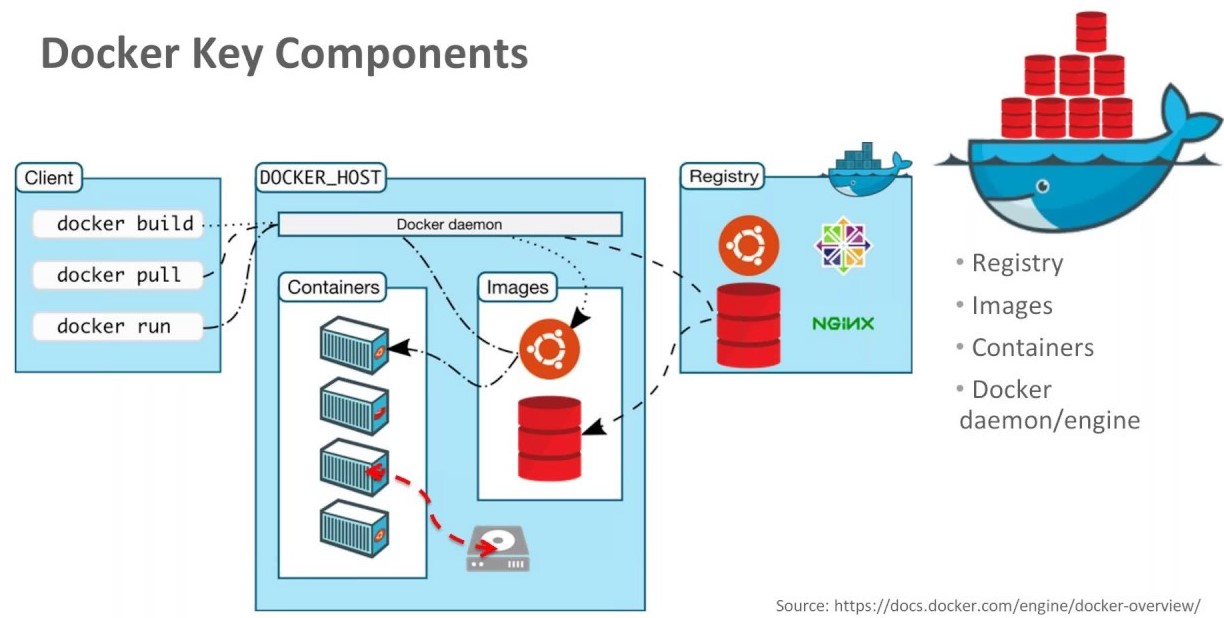

### Docker Networking
<img src="img/docker-nets.png" alt="drawing" width="800"/><br>
Docker networking allows organizing connection between and with Containers. **By default it creates 3 Networks:**
- **Bridge Mode** - mode by default, needs port mapping
- **Host Mode** - faster than bridge mode, there is no routing
- **No Networking (None)** - puts the Container inside of its own network stack 

Plus there is one more:
- **Container Mode** - reuses the networking namespaces of another Container

#### Bridge Mode
It is a private network created by Docker on the Host. All creating Containers are attached to this network by default with IP addresses starting from ```172.17.0.1```. Containers can communicate with each other using this internal IP. To access any of these Containers, **ports mapping is required**. By default **only one internal bridge network is created.** Our own network can be created (User-defined networks)
<br>
<img src="img/own-nets.png" alt="drawing" width="800"/>

#### Host Mode
In this mode the **network between containers and the Host isn't isolated** (i.e. if a container is running on a port 5000 it will be available from the Host on the same port **without requiring any ports mapping**). Thus, running containers on the same port becomes **impossible.**

#### No Networking Mode
Containers **aren't attached to any network** and don't have access to other containers or to the Host. They are in an isolated network.

Containers can access each other **using their names** (better use names rather than IPs because **IPs will change after rebooting**). Docker has a **built-in DNS server** that helps containers finding each other using their names. DNS server always runs on the same address ```127.0.0.11```
<br>
<img src="img/docker-dns.png" alt="drawing" width="800"/>
<br>
The machine on which Docker is installed is called **Docker Host/Docker Engine.** Each **Docker Container has its IP and port** (i.e. **it has its own address** within the **Docker Host** or its own network stack, preventing containers from accessing the sockets or interfaces of another container). Users outside the Docker Host can't access this address. To access a container, ports of a Container and the Docker Host **must be mapped**. It is also known as **ports binding or mapping.**
<br>
<img src="img/port-mapping.png" alt="drawing" width="800"/>

### Docker Compose
Docker Compose is a file where all containers (services) and their parameters are defined. **It makes the process of application deployment much easier.** It's used when a number of Containers is big. All rules for Containers creation are defined in a single file called **docker-compose.yml**. As a result, executing the docker-compose leads to a creation of many different Containers with its own configurations.
- ```docker-compose.yaml``` - define this file in a project folder (the name and extension must be as in the example)

It allows:
- Create multiple isolated environments on a single host
- Preserve volume data when creating containers
- Re-create containers that have been updated
- Use variables and move compositions between environments

**Docker Compose file** is easy to create. It's similar to a **Python Dictionary** where **keys are containers_names and values their configurations**
<br>
<img src="img/docker-compose-file.png" alt="drawing" width="800"/>
<br>

```docker-compose up``` command builds Images first and then runs containers. 

In case of building Images from a dockerfile, provide a path to the file (look up in the pic below)
<br>
<img src="img/docker-compose-build.png" alt="drawing" width="800"/>
<br>

#### Docker-compose Versions
Docker-compose files have different versions that have some limitations. **The current version** must be specified at the **top of the docker-compose file.**
- **Version 1**
    - All **links** between containers **must be defined**
    - No need to define version at the top
    - You **can't specify a type of network used** by containers (bridge by default)
    - **Order** of Containers running **can't be specified**
- **Version 2**
    - A keyword **Services** must be defined (all containers configuration is stored in this property)
    - A keyword **Version** must be defined **at the top**
    - Bridge Network is created automatically and all containers are attached to this network. Thus, **no need to define links** between the containers
    - **Order** of Containers running **can be defined** using ```depends_on``` keyword
    - Own Networks can be defined (e.g. front-end and back-end)
- **Version 3**
    - Supports **Docker Swarm**
    
<br>
<img src="img/docker-compose-versions.png" alt="drawing" width="800"/>
<br>

<br>
<img src="img/docker-compose-nets.png" alt="drawing" width="800"/>
<br>
    
**Containers must be linked** in order to create a system or an **application stack.** For this purpose, the following command must be executed when running a new container.
- ```--link container_name or id:alias``` - links a new container with a certain container (alias names the linkage, optional)

Several ```--links``` can be defined in a single docker command. However, ```--link``` is **deprecated and might be removed** in the future. This is due to a more modern approach.
<br>
<img src="img/containers-links.png" alt="drawing" width="800"/>

### Images Assembly Acceleration 
**One of the strong side of Docker is caching** as a result, Images are built incredibly fast. Whenever a new layer in an Image is built, Docker checks its cache and if the same layer has already been defined it uses it instead of creating.
<br>
<img src="img/layers-reusage.png" alt="drawing" width="800"/>
<br>
**Important**
- If a certain layer is presented in a cache, it's called **cache hit**
- If a certain layer isn't presented in a cache, it's called **cache miss**
- There is a **problem with a file requirements.txt** (old version of the file will be taken)
- Use ```COPY requirements.txt <target-folder>``` to use new requirements
- Layers using commands ```ADD``` and ```COPY``` are checked using the **control sum of the files.** If sums match, a layer from cached is used.
- Caching can be **turned off** using ```--no-cache=True``` in ```docker build``` command 
- If a layer has been changed, all the following layers will be **rebuilt**
- Put layers that are likely to be changed as down in the dockerfile as possible

### Images Size Reduction
There are several options on how the size of Images can be reduced:
1. **Thorough Base Image Selection** (e.g. use **tags with alpine**)
2. **Multistage Image Assembly** (uses several ```FROM``` commands in a **Dockerfile**):
    - Each new ```FROM``` command starts a new assembly
    - Each new assembly doesn't depend on the previous one
    - Each new assembly can use an absolutely different base Image
    
3. **.dockerignore file** 
All files and folders defined in **.dockerignore** will be ignored and excluded from building.
More Info here:
    - https://docs.docker.com/engine/reference/builder/#dockerignore-file
    
**Important**
- Images with tags alpine provide you with a lightweight OS that includes minimum packages
- Alpine requires to follow thorough configuration before app running
- Files and folders in ```.dockerignore``` must be specified using function ```Match()``` from Go language
- To view the content of an Image a **package dive** must be installed: -https://github.com/wagoodman/dive
- For **Multi-Host Networking** an overlay network must be created

**Tips for Images Size Reduction and Assembly Acceleration**
- Always use only **official Images as a base layer**
- To create lightweight Images use Images based on **Alpine Linux**
- Combine long commands using ```\``` into a **single layer**

### Containers Orchestration
We have to pay attention to the containers as well as the host because either the host or a container might be inaccessible, which leads to huge problems. To prevent that exists **containers orchestrations** which consists of **a set of tools and scripts** allowing **monitoring and controlling thousands of containers as well as the hosts.**

#### Docker Swarm 
**A Swarm is a group of machines** running Docker and joined into a cluster. Single Machine is a Node. In the Swarm always there is a **manager** controlling other Nodes (**workers**). A group of nodes controlling by a manager creates a **cluster.** Thus in each cluster is controlled by a manager. **Several managers can manage a cluster.** Docker Swarm has the following functionality:
- Services High-Availability 
- Auto Load-Balancing
- Decentralized Access
- Scaling-Up
- Rolling Updates

**Docker Swarm** is designed for containers deployment control or **containers orchestration.** It allows to check the following properties using a **single service:**
- Containers health must be always checked
- Ensure that all Containers are running
- Loading Scaling 
- Adding Containers updates
<br>
<img src="img/docker-swarm.png" alt="drawing" width="800"/>

### Kubernetes
It's similar to Docker Swarm but better. The idea is the same:**Containers Orchestration** or it's a tool for Containers group control.
- Thousands instances of the same app can be run using a single command
- Clusters and Containers Autoscale based on the load
- Thousands Images update and rollback 
- New features testing on a certain group

### Docker Hub
Before pushing Images on Docker Hub we must log in first.
To push a created image:
1. Build an Image: ```docker build -t username/img_name .``` 
2. Push the Image: ```docker push username/img_name```

### General Commands
- ```docker version``` - prints the current docker version
- ```docker login``` - starts log in operation
- ```docker info``` - returns info about installed Docker
- ```docker system df``` - returns a disk usage of Containers, Images and Volumes
- ```docker --help``` - returns info about other Docker commands
- ```docker system prune``` - removes all **unused data**

### Container Commands
- ```docker container <command>``` - the main command for Containers control. The word ```container``` is optional for some commands

The following commands can be defined:
- ```create img_name``` - creates a Container from an Image
- ```start container_name or id``` - runs an existing Container
- ```restart container_name or id``` - restarts a Container
- ```pause container_name or id``` - pauses a Container
- ```unpause container_name or id``` - inpauses a Container
- ```stop container_name or id``` - stops a Container (or use ```ctr + c```) (after 10s a Container will be stopped)
- ```kill container_name or id``` - stops a Container instantly
- ```stop $(docker ps -qa)``` - stops all Containers 
- ```run img_name or id``` - creates a Container and runs it
- ```rename old_name new_name``` - Container renaming
- ```container ls``` - lists all running Containers
- ```ps``` - lists only running Containers
- ```ps -a``` - list all Containers (both running and not)
- ```ps -a -q``` - list ids of all Containers
- ```inspect container_name or id``` - returns a detailed info about a Container
- ```logs container_name or id``` - returns logs
- ```events container_name or id``` - returns events of a Container
- ```stats container_name or id``` - returns resources usage of a Container (CPU, RAM, Memory)
- ```diff container_name or id``` - inspectins changes to Files or Directories on a Container’s Filesystem
- ```rm container_name or id``` - remose a Container (before removing a Container must be stopped)
- ```rm $(docker ps -qa)``` - removes all Containers
- ```rm -v container_name or id``` - removes a Container and its Volume
- ```docker stop $(docker ps -a -q) && docker rm $(docker ps -a -q)``` - stops and removes all Containers
- ```docker export --output='name.tar' container_name or id``` - exports the content of an Image (**doesn't export attached Volumes**)
- ```docker import file_path``` - imports the file content into a local repo
- ```docker exec -it container_name or id command``` -  runs a new command in a running container

### Images Commands
- ```docker image <command>``` - the main command for images control. The word ```image``` is optional.
The following commands can be defined:
- ```build -t img_name .``` - builds an Image from a **Dockerfile** in the current directory (**dot is important**)
- ```build url``` - builds an Image from a remote resource
- ```image ls``` - prints all Images
- ```images``` - prints all Images
- ```images -qa``` - prints ids of all Images
- ```history img_name or id``` - prints details about an Image
- ```inspect img_name or id``` - returns a detailed info about an Image
- ```rmi img_name or id``` - removes an Image
- ```rmi $(docker images -qa)``` - removes all Images
- ```push img_name``` - uploads an Image to the Docker Registry
- ```pull img_name:tag``` - downloads a certain Image from the Docker Hub 

### Docker-Compose
- ```docker-compose version``` - version of the current docker-compose
- ```docker-compose up -d``` - runs all services from a docker-compose file
- ```docker-compose down``` - stops all services
- ```docker-compose config``` - validates and views the docker-compose file
- ```docker compose --scale container_name=value``` - creates as many Container instacnes as provided 

### Docker Network
- ```docker network ls``` - lists the current docker net info 
- ```docker network inspect net_name``` - lists info about a certain net
- ```docker network create --driver bridge subnet IP --gateway IP network_name``` - creates own network with params
- ```docker network rm net_name``` - removes a network
- ```docker network connect net_name container_name``` - connects a running Container to a certain Network
- ```docker network disconnect net_name container_name``` - disconnects a Container from a certain Network
- ```docker network create --driver bridge --subnet IP --gateway IP net_name - creates a net using bridge driver

### Docker Volume
Docker Volume is a folder stored in a special path
- ```docker volume ls``` - lists all available volumes
- ```docker volume create volume_name``` - creates a volume on a host
- ```docker volume inspect volume_name or id``` -  returns detailed info about a Volume
- ```docker rm volume_name or id``` - deletes a volume
- ```docker prune``` - deletes all unused volumes
- ```docker -v volume_name:absolute_container_path img_name``` - attaches a volume to a container + **add a dir** for data storage

Always remember about the difference between ```-v``` and ```--mount``` flags when working with volumes. The main difference: flag ```--volume``` all parameters are assembled together whereas in ```--mount``` they are separated and have a **key-value** format. Using ```-v``` is an **old-style**. The **new way is to use** ```--mount```

Examples:
- ```type:bind, volume or tmpfs``` - type of mounting
- ```source:volume_name``` - defines a source of mounting
- ```destination:path/in/container``` - defines a folder in a Container
- ```readonly``` - read-only access
- ```docker run --mount type=volume,source=volume_name,destination=/path/in/container,readonly img_name or id```

### Docker Swarm
First, machines must be created
- ```docker-machine create --driver hyperv/virtualbox manager_name``` - creates a **Host Manager**
- ```docker-machine create --driver hyperv/virtualbox worker_name``` - creates a **Worker**
- ```docker-machine ls``` - lists all created machines
- ```docker-machine ip machine_name``` - returns Machine IP
- ```docker-machine ssh machine_name``` - connects to a Machine
- ```docker-machine stop machine_name``` - stops a machine
- ```docker-machine rm machine_name``` - removes a machine

After all Machines have been created, **Swarm initialization is possible**
- ```docker swarm init --advertise-addr manager_ip``` - initializes a Swarm
- ```docker swarm join-token manager``` - joins the Swarm as a Manager (the command must be run on a Manager)
- ```docker swarm join-token worker``` - joins the Swarm as a Worker (the command must be run on a Manager)
- ```docker swarm leave``` - leaves the Swarm (can be run either on a **master or a worker node**)
Then a command will be given which must be run **from a worker to join the Manager Swarm**. To verify that a Worker/Manager has been successfully joined the Swarm, run the below command:
- ```docker node ls``` - lists all nodes of a manager (the command must be run on a Manager)
-```docker info``` - returns info about the Swarm

After the Swarm was initialized, we can run Containers (commands must be run from the Manager)
- ```docker service create --replicas value -p hst_prt:cnt:prt --name name img_name``` - runs provided replicas on a node
- ```docker service ls``` - lists all services

**Service Scaling Up and Down** (commands must be run from the Manager)
- ```docker service scale service_name=value``` - scales up and down 
- ```docker inspect node_name``` - lists info about a node

**Services Update**
- ```docker service update --image img_name:tag service_name``` - updates a service

**Service Removing**
- ```docker service rm service_name``` - removes a Service



### Flags 
Flags adds additional conditions on a script. They may start with ```-```(short option, alias) or ```--``` (full flag name)
- ```--name name``` - defines a name (e.g. for a Container)
- ```-d``` - (detached) runs a container in a detached mode (the terminal will be free)
- ```--rm``` - (remove) deletes all containers when a container either was stopped or finished it's job 
- ```-p host_port:container_port``` - (port) maps host and Container ports
- ```-P``` - exposes all ports for a container
- ```--network=value``` - defines a certain net for a container
- ```-e variable=value``` - allows providing an environment variable in script 
- ```-a``` - (attach) allows connecting a container to ```STDIN```, ```STDOUT``` or ```STDERR```
- ```-a``` - (all) allows listing all Containers/Images 
- ```-q``` - (quite) shows IDs
- ```-f``` - (filter) filters the output based on a provided condition
- ```-s``` - (size) allows listing size of a Container/Image
- ```-t``` - (tag) allows creating a tag
- ```-v``` - (volume) defines a vlume
- ```--mount``` - similar to ```-v```
- ```-i``` - (interactive) runs a container in an interactive mode (i.e. a container will be listening for the commands)
- ```-t``` - (terminal) allows to see terminal commands from a container
- ```--cpus=value``` limits the CPU usage by containers (e.g. docker run --cpus= .5 ubuntu)
- ```--memory=value``` limits memory available for containers (e.g. docker run --memory=100m ubuntu)
- ```--network=net_name``` - connects a Container to a Network when it starts
- ```--disable-content-trust=true/false``` - verifies the content trust (**true** by default)
- ```--version``` - displays the current Docker version
- ```--help``` - returns help info
- ```--mode global``` - provide this flag on a Manager Machine to create services on all machine using a single command 
- ```--ti``` - creates target image
- ```-ipc``` - inter-process communication

### Self-Check
- What is Docker ?
- Why to use Docker ?
- What is a Docker Image ?
- What is a Dockerfile ?
- What commands in Dockerfile can you name ? ( + describe each command)
- Difference between ```CMD``` and ```ENTRYPOINT``` ?
- Is it obligatory for a dockerfile to start with ```FROM``` command ?
- Is layer order important ?
- What Is a Docker Container ? 
- Compare a VM and a Docker Container ?
- Does a container has its own layer ?
- How does a communication with containers happen ?
- What is a docker volume ? Name its properties
- What is a docker engine ?
- Tell about Docker Networking (3 main modes)
- What is a Docker-compose ?
- Tell about different versions of docker-compose 
- How to accelerate an Image assembly
- How to reduce an Image size
- What is containers orchestration ?
- Tell about Docker Swarm

### Useful Links
- https://runnable.com/docker/ # cool documentation
- https://github.com/wsargent/docker-cheat-sheet#dockerfile # Docker Cheat Sheet
- https://www.youtube.com/watch?v=zJ6WbK9zFpI # Amazing Course
- https://runnable.com/docker/python/dockerize-your-flask-application # Simple Example of Making a Container (Flask Web App)